# Table of Contents
## Functions

- sigmod
- logit
- relue
- softmax
- exp
- tanh

## Derivation 

- sigmoid derivative
- sofmax partial derivative
- softmax with loss partial derivative
- tanh derivative
- sample variance

In [5]:
import warnings
warnings.filterwarnings('ignore');
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logit(p):
    return np.log(p /(1 - p))

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    if x.ndim == 1:
        x -= np.max(x) # scale down
        x = np.exp(x)
        return x / np.sum(x)

    if x.ndim == 2: # batch
        x -= x.max(axis=1, keepdims=True)
        x = np.exp(x)
        return x / x.sum(axis=1, keepdims=True)

exp = (lambda n: (1+(1/(10**n)))**(10**n))(8)

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

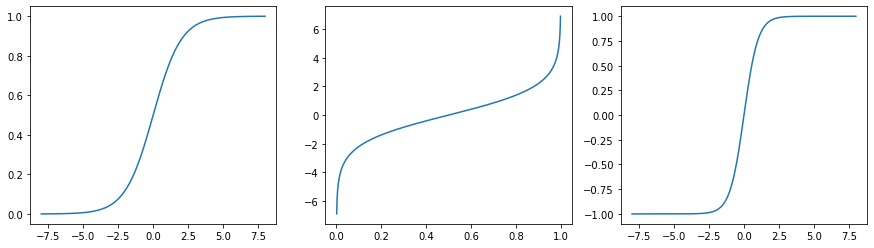

In [10]:
x, p = np.linspace(-8,8,1000), np.linspace(0,1,1000)
_, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,4))
ax1.plot(x, sigmoid(x))
ax2.plot(p[1:-1], logit(p[1:-1])) # slicing to avoid zerp devisions
ax3.plot(x, tanh(x))

## Sigmoid Derivative

$$
\large S = \frac{1}{1+\exp(-x)}
$$

$$
\large \frac{dS}{dx}\;=\; -\frac{1}{(1+\exp(-x))^2} \exp(-x) (-1) \;=\; \frac{\exp(-x)}{(1+\exp(-x))^2}
$$

$$
\large \; = \; \frac{1}{1+\exp(-x)} \Bigl(\frac{1+\exp(-x)}{1+\exp(-x)} - \frac{1}{1+\exp(-x)} \Bigr)
\;=\; S(1-S)
$$

## Softmax Partial Derivative

$$
\large \; S \;=\;\frac{\exp(a_k)}{\sum_{i=1}^n \exp(a_i)} \quad \quad ; \; \sum \;=\; \sum_{i=1}^n \exp(a_i),\quad a_k \ne a_j
$$

$$
\large \frac{\partial S}{\partial a_k}  \; = \; \frac{\exp(a_k)\sum - \exp(a_k)\sum'}{\sum^2} \; = \; \frac{\exp(a_k)\sum - \exp(a_k)\exp(a_k)}{\sum^2}
$$

$$
\large \frac{ \Big(\sum - \exp(a_k)\Big) \exp(a_k)}{\sum^2}\;=\;\frac{\exp(a_k)}{\sum} \frac{\sum - \exp(a_k)}{\sum} \; = \; S(1-S)
$$

$$
\large \frac{\partial S}{\partial a_j}  \; = \; \frac{0\sum - \exp(a_k)\sum'}{\sum^2} \; = \; \frac{0 - \exp(a_k)\exp(a_j)}{\sum^2}
 \; = \; S(0-S)
$$

## Softmax with Loss Partial Derivative

$$
\large
Categorical \, Cross \, Entropy \, Error \quad L = -\frac{1}{n}\sum_{i=1}^n t_i\log(y_i)
\quad \quad ; \; y_i \;=\ Softmax(a_i);
$$

$$
\large \frac{\partial L(S(a_k))}{\partial a_k} \;=\; \Big(-\frac{t_k}{S}\Big) \frac{\partial S}{\partial a_k}
\;=\;  \Big(-\frac{t_k}{S}\Big) S(1-S) \; = \; t_k(S-1)
$$

$$
\large \frac{\partial L(S(a_k))}{\partial a_j} \;=\; \Big(-\frac{t_k}{S}\Big) \frac{\partial S}{\partial a_k}
\;=\;  \Big(-\frac{t_k}{S}\Big) S(0-S) \; = \; t_k(S-0)
$$

$$
\large \frac{\partial L(S(a_k))}{\partial I_i} \;=\; t_k(S-I_i) \qquad; 
\; I = Identity\; Matrix \quad \{1\;|\;i = k,\quad0\;|\;i \neq k\}
$$

## Hyperbolic Tangent Derivative

$$
\large S =\; \frac{f}{g} = \frac{\exp(x)-\exp(-x)}{\exp(x)+\exp(-x)}
$$

$$
\large \frac{dS}{dx}\;=\; \frac{f'g-fg'}{g^2} \;=\; \frac{(\exp(x)-\exp(-x))'g - f(\exp(x)+\exp(-x))'}{g^2}
$$

$$
\large \frac{g^2-f^2}{g^2} \;= \; 1 - S^2 \quad \quad ; \; \frac{1}{cosh^2x}
$$

## Sample Variance

$$
\large V[\bar{X}] =\; E[(\bar{X} - \mu)^2] \quad \quad ; \; \mu \;is\;expectation\;of\;sample\;and\;population
$$

$$
\large E[(\frac{1}{n}\sum_{i = 1}^n X_{i} -\mu)^2] \;=\; E[\{\frac{1}{n}(\sum_{i = 1}^n X_{i} -n\mu)\}^2]
\;=\; \frac{1}{n^2}E[\{\sum_{i = 1}^n (X_{i} -\mu)\}^2]
$$

$
\begin{align}
\large \quad Inside \; E[]
\end{align}
$

$$
\large \sum_{i = 1}^n (X_{i} -\mu)\sum_{j = 1}^n (X_{j} -\mu)
\;=\; \sum_{i = 1}^n \sum_{j = 1}^n (X_{i} -\mu)(X_{j} -\mu)
$$

$
\begin{align}
\large \qquad where\; X_{i} = X_{j}\qquad => \qquad (X_{i} - \mu)^2 \qquad ; \; n\;time\;occurrence
\end{align}
$

$
\begin{align}
\large \qquad where\; X_{i} \neq X_{j}\qquad => \qquad (X_{i} - \mu)(X_{j} - \mu)
\;=\; E[X_{i}]E[X_{j}] -\mu E[X_{i}] -\mu E[X_{j}] +\mu^2
\end{align}
$

$$
\large \;=\; \mu^2 -\mu^2 -\mu^2 +\mu^2 \;=\; 0
$$

$
\begin{align}
\large \quad Outside \; E[]
\end{align}
$

$$
\large \frac{1}{n^2}E[\sum_{i = 1}^n \sum_{j = 1}^n (X_{i} -\mu)(X_{j} -\mu)]
\;=\; \frac{1}{n^2}E[n(X_{i} - \mu)^2]
$$

$$
\large \frac{1}{n}E[(X_{i} - \mu)^2] \;=\; \frac{1}{n}V[X]
$$